# **SUPERMARKET CUSTOMERS ANALYSIS**

---

## **BACKGROUND**

Perusahaan retail memiliki fungsi untuk menyediakan kebutuhan masyarakat dengan menjual produk sesuai dengan kebutuhan dan minat konsumen. Salah satu faktor keberhasilan perusahaan retail yaitu dengan memiliki strategi yang tepat. 

Tim Retail Market/Project pada sebuah perusahaan retail membutuhkan insights dari Data Analyst, untuk menyusun strategi dengan menyesuaikan produk yang dijual dengan kebutuhan atau minat konsumen salah satunya dengan memberikan *Promotion* dari beberapa *campaign*. Dari *Campaign* tersebut terdapat beberapa insight menarik terkait karakteristik *Customer* sebagai pelanggan dalam merespon sebuah *Campaign*, dengan memahami terkait karakteristik *Customer* diharapkan kedepannya memiliki langkah yang tepat dalam bentuk sebuah *Promotion*.

Oleh karena itu, Data Analyst akan bekerja dengan maksimal untuk dapat memberikan jawaban atas setiap pernyataan masalah yang ada.

---

## **RESEARCH QUESTIONS**

Pada awal tahun 2015 ini, Tim Retail Market membutuhkan analisis dari data pelanggan tahun 2012-2014, untuk menyusun stategi pemasaran untuk setahun ke depan agar dapat meningkatkan profit perusahaan dari segi *Promotion*. Analisis yang diperlukan oleh Tim Retail Market yaitu:
1. Bagaimana tren jumlah Campaign yang diberikan dengan Respon yang diterima setiap bulan dari tahun 2012 sampai dengan 2014
2. Karakteristik Generasi dalam merespon sebuah Campaign
3. Karakteristik *Customer's* dalam merespon sebuah Campaign berdasarkan status
4. Karakteristik *Customer's* dalam merespon sebuah Campaign berdasarkan pendapatan

## **DATA**
Sehubungan dengan pernyataan masalah diatas, kita akan menganalisa data pelanggan yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/file/d/19Cq5j6epyo5fZ1HBk24Ln6wuPnTr1mOt/view?usp=sharing).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

Pada dataset ini, berisi informasi tentang karakteristik pelanggan **(People)**, jenis produk yang dibeli **(Products)**, jumlah pembelian berdasarkan promosi **(Promotion)**, jumlah pembelian berdasarkan tempat pembelian **(Place)**. Dataset ini berisi 29 kolom, yaitu:

### People
- ID : ID unik pelanggan
- Year_Birth : Tahun lahir pelanggan
- Education : Tingkat pendidikan pelanggan
- Marital_Status : Status pernikahan pelanggan
- Income : Pendapatan pelanggan
- Kidhome : Jumlah anak dalam rumah tangga pelanggan
- Teenhome : Jumlah remaja dalam rumah tangga pelanggan
- Dt_Customer : Tanggal pendaftaran pelanggan dengan perusahaan
- Recency : Jumlah hari sejak pembelian terakhir pelanggan
- Complain : 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya

#### Products
- MntWines : Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
- MntFruits : Jumlah yang dihabiskan untuk buah dalam 2 tahun terakhir
- MntMeatProducts : Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts : Jumlah yang dihabiskan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts : Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir
- MntGoldProds : Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

#### Promotion
- NumDealsPurchases : Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1 : 1 jika pelanggan menerima promosi di campaign pertama, 0 jika tidak
- AcceptedCmp2 : 1 jika pelanggan menerima promosi di campaign kedua, 0 jika tidak
- AcceptedCmp3 : 1 jika pelanggan menerima promosi di campaign ketiga, 0 jika tidak
- AcceptedCmp4 : 1 jika pelanggan menerima promosi di campaign keempat, 0 jika tidak
- AcceptedCmp5 : 1 jika pelanggan menerima promosi di campaign kelima, 0 jika tidak
- Response : 1 jika pelanggan menerima promosi di campaign terakhir, 0 jika tidak

#### Place
- NumWebPurchases : Jumlah pembelian yang dilakukan melalui website perusahaan
- NumCatalogPurchases : Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases : Jumlah pembelian dilakukan langsung di toko
- NumWebVisitsMonth : Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

Berikut dataset dari **Supermarket Customers**:

In [2]:
df = pd.read_csv("./Supermarket Customers.csv", sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


---
## **DATA UNDERSTANDING AND CLEANING**

### **General Information**

<p>Sebelum masuk ke dalam analisis, di bagian ini akan ditampilkan penjelasan awal mengenai data yang kita gunakan. Pada bagian ini juga akan dilakukan cleaning data untuk membersihkan hal-hal yang tidak wajar di dalam dataset serta mengkondisikan data agar dapat dianalisis secara tepat sesuai dengan permasalahan.<p>

In [3]:
# Informasi mengenai jumlah baris dan kolom dataset serta nama dan datatype tiap kolom
print(f'Dataset Supermarket Customers.csv memiliki {df.shape[0]} Baris dan {df.shape[1]} kolom')
df.info()

Dataset Supermarket Customers.csv memiliki 2240 Baris dan 29 kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         

In [4]:
# Ringkasan deskriptive statistics pada kolom numerikal dan kolom kategorikal
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [5]:
pd.set_option('display.max_colwidth', -1)
# data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col,df[col].dtype , df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name','Typedata', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Typedata,Number of Unique,Unique Sample
0,ID,int64,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,int64,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,object,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,float64,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,int64,3,"[0, 1, 2]"
6,Teenhome,int64,3,"[0, 1, 2]"
7,Dt_Customer,object,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,int64,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,int64,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96,

Berdasarkan informasi umum diatas, dapat kita ketahui bahwa:
* Dataset marketing_campaign memiliki **29 kolom** dan **2240 baris**
* Data kosong (data NaN) hanya terdapat pada **kolom 'Income'**
* Kolom **'Z_CostContact'** dan **'Z_Revenue'** memiliki nilai yang sama, sehingga dapat didrop
* Kolom **'Dt_Customer'** memiliki tipe data object, yang sebaiknya diubah menjadi tipe data datetime

### **Duplicates**

Mengecek data duplikat

In [6]:
# Mengecek data duplikat
df.duplicated().unique()

array([False])

In [7]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


### **Formatted Data**

Mengubat tipe data 

In [8]:
# Mengubah type data pada kolom Dt_Customer menjadi datetime
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

In [9]:
### Membuat kolom tanggal acuan data dikumpulkan
df['Observed_Time'] = '2015-02-02'
df['Observed_Time'] = pd.to_datetime(df['Observed_Time'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### **Replace Data**

Untuk mengetahui siapa saja yang diberikan *Promotion* kita perlu menjumlahkan semua *Campaign* yang sudah di keluarkan untuk *Customer's* agar sesuai dengan target analisis.

In [11]:
# untuk mengetahui total campaign yang diterima customer dari pertama sampai akhir
df['Total_Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [12]:
### Membuat kolom umur dari data Year_Birth agar lebih mudah dipahami
df['Age'] = 2015 - df['Year_Birth']

In [13]:
## Mengelompokan ketagori customer kedalam segmentasi berdasarkan kelahiran

kel=[]
for i in range(len(df)):
    if df['Year_Birth'][i] < 1945:
        kel.append('Pre-boomer')
    elif df['Year_Birth'][i]<=1945 or df['Year_Birth'][i]<=1964:
        kel.append('Baby boomer')
    elif df['Year_Birth'][i]<=1965 or df['Year_Birth'][i]<=1980:
        kel.append('Gen X')
    elif df['Year_Birth'][i]<=1981 or df['Year_Birth'][i]<=1996:
        kel.append('Milenial')
    else:
        kel.append('Gen Z')

df['Generation_Types'] = kel

In [14]:
## Mengelompokan ketagori customer kedalam segmentasi berdasarkan Income

kel = []
for i in range(len(df)):
    if df['Income'][i]<5000:
        kel.append('Poor')
    elif df['Income'][i]<=5001 or df['Income'][i]<=50000:
        kel.append('Lower Middle Class')
    elif df['Income'][i]<=50001 or df['Income'][i]<=70000:
        kel.append('Middle')
    elif df['Income'][i]<=70001 or df['Income'][i]<=100000:
        kel.append('Upper Middle Class')
    else:
        kel.append('Rich')

df['Income_Status'] = kel

In [15]:
## Mengelompokan ketagori customer kedalam segmentasi berdasarkan Terakhir Pembelian

kel = []
for i in range(len(df)):
    if df['Recency'][i]<30:
        kel.append('30 Days')
    elif df['Recency'][i]<=30 or df['Recency'][i]<=60:
        kel.append('60 Days')
    elif df['Recency'][i]<=60 or df['Recency'][i]<=90:
        kel.append('90 Days')
    elif df['Recency'][i]<=90 or df['Recency'][i]<=120:
        kel.append('120 Days')
    
df['LastPurchase'] = kel

Terdapat 3 kolom tambahan berdasarkan kolom yang sudah tersedia yaitu kolom Year_Birth, Income, Recency yang menciptakan kolom baru sebagai berikut:
- Generation_Types : karena kolom Year_Birth terlalu banyak untuk unique value maka dari itu akan di kagetorikan berdasarkan generasi
-  Income_Status : kolom Income terlalu banyak untuk setiap unique value maka dari itu akan di kagetorikan berdasarkan status pendapatan
- Recency : sama halnya dengan dua kolom sebelumnya dan akan dibuat kolom LastPurchase 

In [16]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Total_Campaign,Age,Generation_Types,Income_Status,LastPurchase
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,0,58,Baby boomer,Middle,60 Days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,0,61,Baby boomer,Lower Middle Class,60 Days


### **Outliers Data**

Mengecek data yang outlier

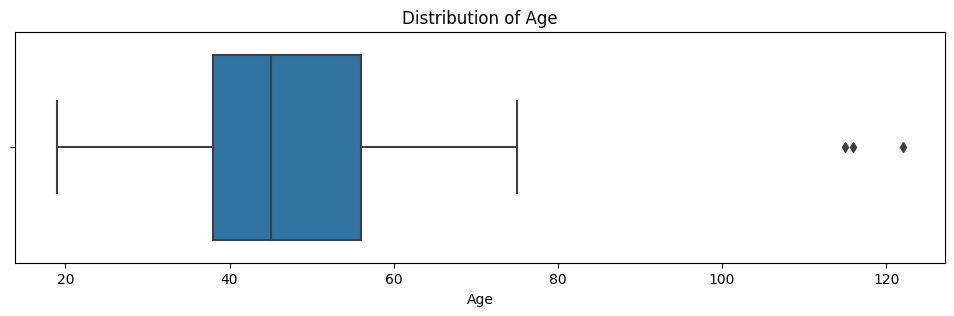

In [17]:
# Age
plt.figure(figsize=(12,3))
sns.boxplot(data=df, x='Age')
plt.title('Distribution of Age');

In [18]:
df[df['Age']> 80]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Total_Campaign,Age,Generation_Types,Income_Status,LastPurchase
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,2015-02-02,0,115,Pre-boomer,Lower Middle Class,120 Days
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,2015-02-02,0,122,Pre-boomer,Middle,30 Days
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,2015-02-02,1,116,Pre-boomer,Upper Middle Class,60 Days


- Terdapat 3 data yang outliers pada kolom 'Age', yaitu usia 114, 121, dan 115 tahun
- Hanya sedikit kemungkinan orang berusia diatas 100 tahun
- akan dihapus dikarena sudah tidak menjadi target pasar untuk kedepannya

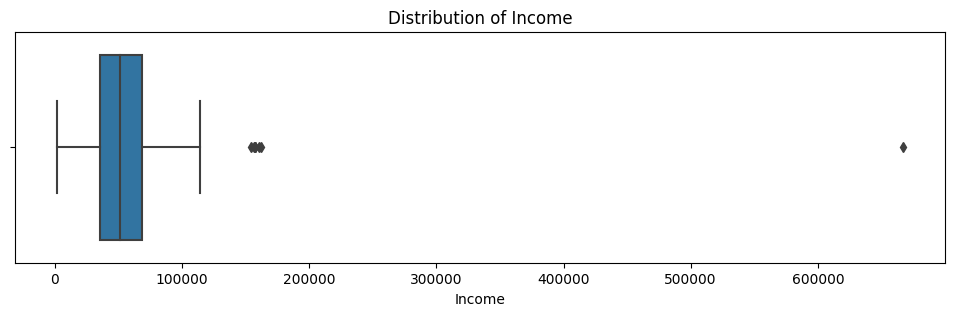

In [19]:
# Income  
plt.figure(figsize=(12,3))
sns.boxplot(data=df, x='Income')
plt.title('Distribution of Income');

In [20]:
df[df['Income']> 100000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Total_Campaign,Age,Generation_Types,Income_Status,LastPurchase
124,7215,1983,Graduation,Single,101970.0,0,0,2013-12-03,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,3,11,1,2015-02-02,3,32,Milenial,Rich,90 Days
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,2015-02-02,0,42,Gen X,Rich,120 Days
203,2798,1977,PhD,Together,102160.0,0,0,2012-02-11,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,3,11,1,2015-02-02,3,38,Gen X,Rich,60 Days
252,10089,1974,Graduation,Divorced,102692.0,0,0,2013-05-04,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1,2015-02-02,4,41,Gen X,Rich,30 Days
617,1503,1976,PhD,Together,162397.0,1,1,2013-03-06,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0,2015-02-02,0,39,Gen X,Rich,60 Days
646,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,3,11,1,2015-02-02,2,45,Gen X,Rich,60 Days
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,2015-02-02,0,40,Gen X,Rich,90 Days
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,2015-02-02,0,33,Milenial,Rich,30 Days
1300,5336,1971,Master,Together,157733.0,1,0,2013-04-06,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0,2015-02-02,0,44,Gen X,Rich,60 Days
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,2015-02-02,0,38,Gen X,Rich,30 Days


Sebagai Customer satu-satunya yang memiliki Income 666666.0 customer tersebut akan di perlakukan khusus untuk mendapatkan benefit lebih dari yang lain, maka dari itu akan di drop dan dialihkan ke departement lain yang dianggap mampu menangani customer prioritas.

### **Missing Data**

Mengecek dan menangani missing value pada data

In [21]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
Observed_Time          0.000000
Total_Campaign         0.000000
Age     

### **Drop Data**

Menghapus data yang tidak diperlukan

#### **`Income`**

In [22]:
df.dropna(subset=['Income'], inplace=True)

In [23]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Observed_Time          0
Total_Campaign         0
Age                    0
Generation_Types       0
Income_Status          0
LastPurchase           0
dtype: int64

Menghapus baris customer yang tidak memiliki pendapatan, karena untuk saat ini hanya fokus ke pelanggan yang hanya memiliki income. Untuk data customer yang tidak memiliki income tidak bisa menjadi acuan karena belum dapat informasi lebih lanjut terkait Customer yang tidak memiliki pendapatan apakah memang tidak memiliki atau adanya kesalahan input yang mengakibatkan tidak tercantumnya pendapatan.

In [24]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Total_Campaign,Age,Generation_Types,Income_Status,LastPurchase
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,0,58,Baby boomer,Middle,60 Days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,0,61,Baby boomer,Lower Middle Class,60 Days


In [25]:
# Menghapus kolom 'ID', 'Z_CostContact' dan 'Z_Revenue' karena memiliki nilai yang sama dan tidak diperlukan dapat proses analisis
df= df.drop(columns=['ID','Z_CostContact', 'Z_Revenue'],axis=1)
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Observed_Time,Total_Campaign,Age,Generation_Types,Income_Status,LastPurchase
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2015-02-02,0,58,Baby boomer,Middle,60 Days
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2015-02-02,0,61,Baby boomer,Lower Middle Class,60 Days
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2015-02-02,0,50,Gen X,Upper Middle Class,30 Days
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2015-02-02,0,31,Milenial,Lower Middle Class,30 Days
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2015-02-02,0,34,Milenial,Middle,120 Days


karena tadi ada data outlier pada kolom `Income` dengan pendapatan paling tinggi maka dari itu akan di drop karena akan dilakukan cara khusus untuk menangani customer tersebut.

In [26]:
# Melakukan pengecekan kembali untuk kolom Income dari yang paling tinggi
df[['Income']].sort_values('Income', ascending=False).head(3)

,Income
2233,666666.0
617,162397.0
687,160803.0


In [27]:
# menghapus customer dengan Income paling tinggi
df.drop(2233, inplace=True)
df[['Income']].sort_values('Income', ascending=False).head(2)

,Income
617,162397.0
687,160803.0


Menghapus data outlier pada kolom `Age` dikarenakan ada umur yang memang sudah tidak menjadi target.

In [28]:
# Melakukan pengecekan kembali untuk kolom Age
df[['Age']].sort_values('Age', ascending=False).head(5)

,Age
239,122
339,116
192,115
1950,75
424,74


In [29]:
# menghapus customer dengan Umur paling tinggi
df.drop([239,339,192], inplace=True)

In [30]:
df[['Age']].sort_values('Age', ascending=False).head(3)

,Age
1950,75
424,74
894,72


Melihat kembali data yang sudah di bersihkan berdasarkan tujuan analisis.

In [31]:
# Informasi mengenai jumlah baris dan kolom dataset serta nama dan datatype tiap kolom
print(f'Dataset Supermarket Customers.csv setelah dibersihkan saat ini memiliki {df.shape[0]} Baris dan {df.shape[1]} kolom')
df.info()

Dataset Supermarket Customers.csv setelah dibersihkan saat ini memiliki 2212 Baris dan 32 kolom
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2212 non-null   int64         
 1   Education            2212 non-null   object        
 2   Marital_Status       2212 non-null   object        
 3   Income               2212 non-null   float64       
 4   Kidhome              2212 non-null   int64         
 5   Teenhome             2212 non-null   int64         
 6   Dt_Customer          2212 non-null   datetime64[ns]
 7   Recency              2212 non-null   int64         
 8   MntWines             2212 non-null   int64         
 9   MntFruits            2212 non-null   int64         
 10  MntMeatProducts      2212 non-null   int64         
 11  MntFishProducts      2212 non-null   int64         

In [32]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Observed_Time          0
Total_Campaign         0
Age                    0
Generation_Types       0
Income_Status          0
LastPurchase           0
dtype: int64

Memahami Data kembali

In [33]:
coun_series = df['Total_Campaign'].count()
coun_series

2212

In [34]:
# mengetahui jumlah unique customer yang menerima Campaign
count_get_camp = df[df['Total_Campaign']!= 0]
result_camp = int(count_get_camp.shape[0])
result_camp

458

In [35]:
# mengetahui jumlah customer yang Merespon
count_respon = count_get_camp[count_get_camp['Response']!=0]
result_respon = int(count_respon.shape[0])
result_respon

187

In [36]:
print(f"Setelah tahap data cleaning, kita bisa mengetahui saat ini jumlah total data Customer's {df.shape[0]} dengan Promosi yang sudah di diberikan untuk\n{result_camp} Customer's seharusnya yang merespon memiliki angka yang sama dengan Campaign yang dibuat, karena respon merupakan bentuk pemberitahuan bahwa\natas apa yang customer terima, namun jika dilihat dari angka yang di dapat bahwa dari Campaign tersebut yang melakukan respon hanyalah {result_respon}.\nangka tersebut hanyalah {((result_respon/result_camp)*100).__round__(2)}% dari total yang diberikan campaign")

Setelah tahap data cleaning, kita bisa mengetahui saat ini jumlah total data Customer's 2212 dengan Promosi yang sudah di diberikan untuk
458 Customer's seharusnya yang merespon memiliki angka yang sama dengan Campaign yang dibuat, karena respon merupakan bentuk pemberitahuan bahwa
atas apa yang customer terima, namun jika dilihat dari angka yang di dapat bahwa dari Campaign tersebut yang melakukan respon hanyalah 187.
angka tersebut hanyalah 40.83% dari total yang diberikan campaign


---
## **DATA ANALYSIS**

Setelah tahap data cleaning, maka data siap untuk dianalisis. Berikut tabel yang sudah bersih:

In [37]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Observed_Time,Total_Campaign,Age,Generation_Types,Income_Status,LastPurchase
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2015-02-02,0,58,Baby boomer,Middle,60 Days
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2015-02-02,0,61,Baby boomer,Lower Middle Class,60 Days
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2015-02-02,0,50,Gen X,Upper Middle Class,30 Days
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2015-02-02,0,31,Milenial,Lower Middle Class,30 Days
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2015-02-02,0,34,Milenial,Middle,120 Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2015-02-02,0,48,Gen X,Middle,60 Days
2236,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,2015-02-02,1,69,Baby boomer,Middle,60 Days
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,2015-02-02,1,34,Milenial,Middle,120 Days
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2015-02-02,0,59,Baby boomer,Middle,30 Days


Disini kita mencoba untuk mencari tahu bagaimana cara untuk mencari tahu karakteristik dari *Customer's* yang merespon dan tidak di kolom `Response` dengan indikator 1 adalah yang merespon dan 0 adalah yang tidak merespon. Upaya tersebut untuk dapat dilakukan dengan menyusun beberapa rekomendasi dari karakter pembeli setelah di Data Cleansing. Untuk mendapat insight kita dapat mencoba mengolah data dengan menjawab beberapa pertanyaan berikut:

1. Bagaimana tren jumlah Campaign yang diberikan dengan Respon yang diterima setiap bulan dari tahun 2012 sampai dengan 2014.
2. Karakteristik Generasi dalam merespon sebuah Campaign
3. Karakteristik *Customer's* dalam merespon sebuah Campaign berdasarkan status
4. Karakteristik *Customer's* dalam merespon sebuah Campaign berdasarkan pendapatan

### **Trend of Customer Response**

Mengetahui jumlah Customer yang merespon setiap *Campaign* yang diterima.

In [38]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month
df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Observed_Time,Total_Campaign,Age,Generation_Types,Income_Status,LastPurchase,Year,Month
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2015-02-02,0,58,Baby boomer,Middle,60 Days,2012,4
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2015-02-02,0,61,Baby boomer,Lower Middle Class,60 Days,2014,8


In [39]:
trend_respon=df.groupby(['Year','Month']).sum()[['Response']][0:39]
trend_respon

Response
Year Month          
2012 1      5       
     2      3       
     3      5       
     4      4       
     5      1       
     6      5       
     7      7       
     8      25      
     9      26      
     10     23      
     11     14      
     12     14      
2013 1      17      
     2      16      
     3      13      
     4      16      
     5      12      
     6      12      
     7      12      
     8      12      
     9      6       
     10     19      
     11     12      
     12     6       
2014 1      8       
     2      8       
     3      7       
     4      5       
     5      5       
     6      6       
     7      3       
     8      2       
     9      0       
     10     3       
     11     0       
     12     1

#### **1. Bagaimana tren jumlah Campaign yang diberikan dengan Respon yang diterima setiap bulan dari tahun 2012 sampai dengan 2014.**

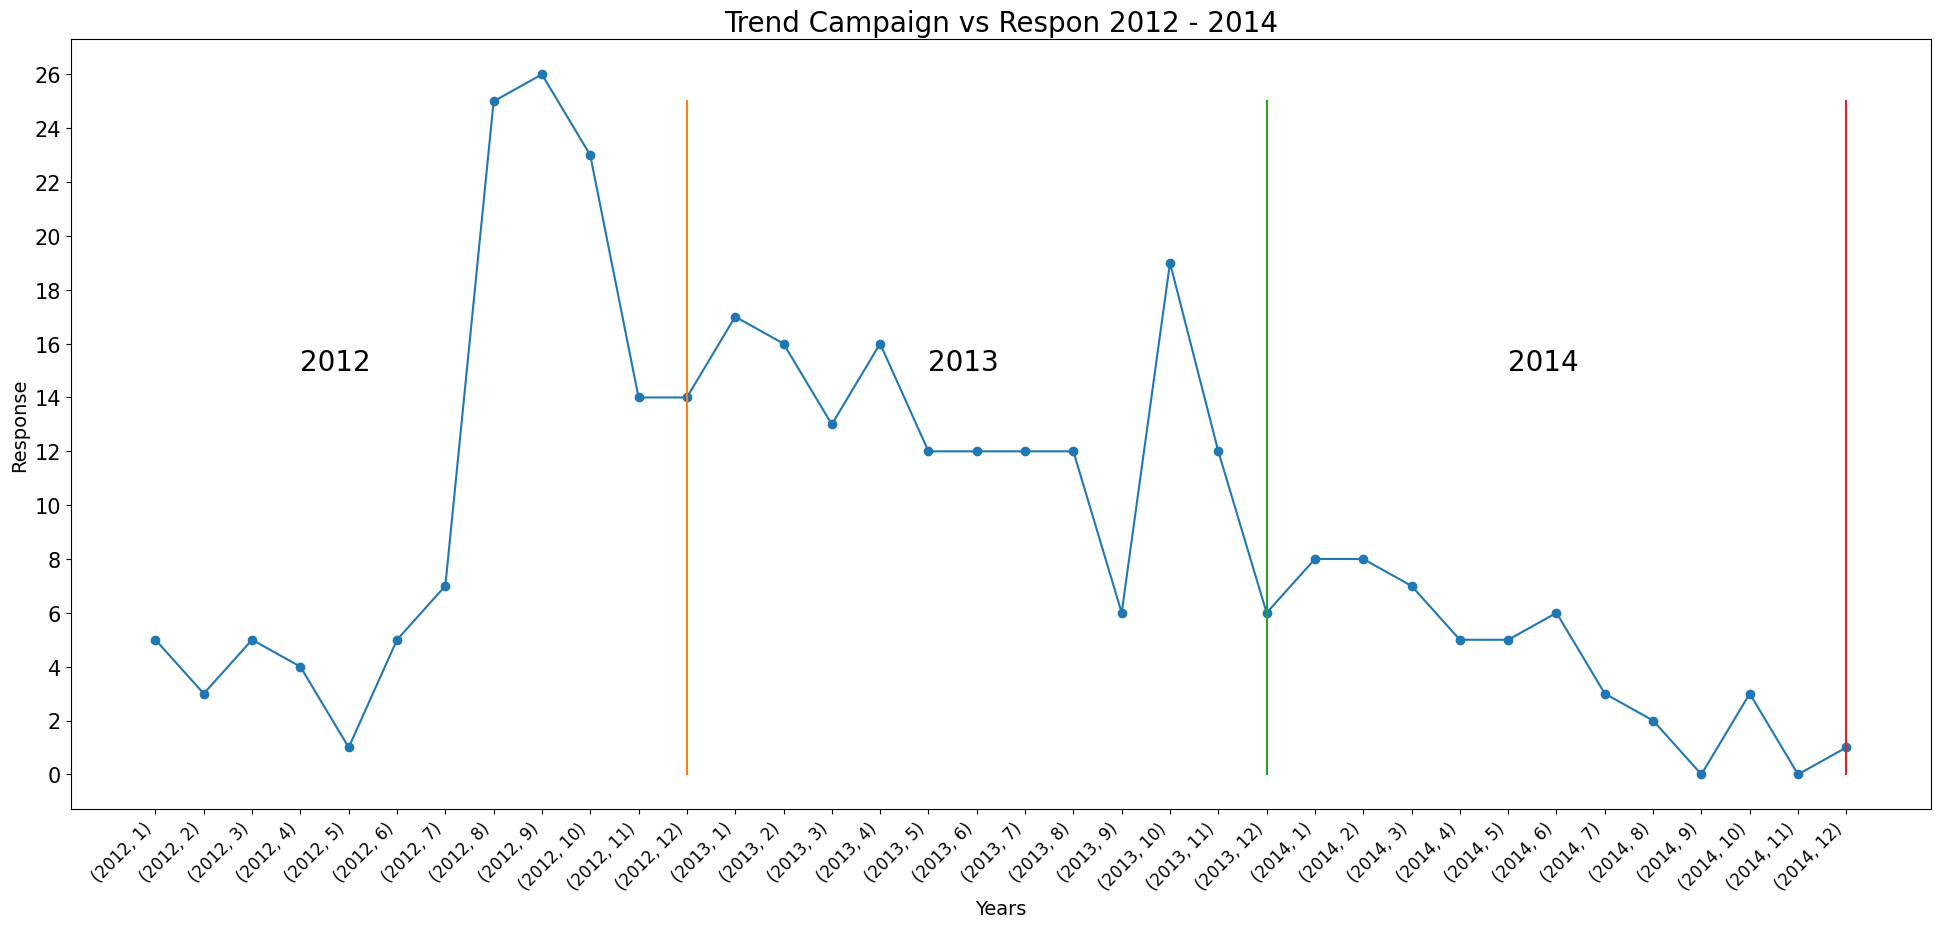

In [40]:
plt.figure(figsize=(24,10))
plt.plot(trend_respon.reset_index()['Response'], 'o-')
plt.plot([11,11], [0,25])
plt.plot([23,23], [0,25])
plt.plot([35,35], [0,25])
plt.text(3,15,'2012',size=20)
plt.text(16,15,'2013',size=20)
plt.text(28,15,'2014',size=20)
plt.xticks(np.arange(0,36), trend_respon.index, rotation=45,ha="right",size=12)
plt.yticks(np.arange(0,28,2),size=15)
plt.xlabel('Years',size=14)
plt.ylabel('Response',size=14)
plt.title('Trend Campaign vs Respon 2012 - 2014',size=20)
# plt.savefig('trend_campaign_vs_respon.png', dpi=300, bbox_inches='tight')
plt.show()

**Insight**
1. Dari grafik diatas dapat dilihat bahwa terdapat fluktuatif dari tren jumlah yang respon setiap tahunnya. Dengan dibedahnya tren yang respon dari tahun 2012 - 2014 jika kita bisa lihat bahwa terjadi penurunan tren di akhir tahun 2014 dari yang memiliki kenaikan di tahun 2013 lalu drop di tahun tersebut.

**Analisis** 
1. Setelah dilakukan pengecekan lebih mendalam terdapat penurunan drastis yang terjadi di tahun 2014 dikarena mayoritas dari yang tidak merespon adalah customer yang sudah registrasi lebih dari 1 bulan, lebih dari 2 bulan dan tidak ada yang respon *campaign* dengan status registrasi lebih dari 3 bulan.<p>

![pivot excel](./picture/2.png) 

**Rekomendasi**
1. Karena kesadaran yang cepat akan penurunan tren di akhir tahun terakhir ini, agar tidak terjadi hal yang sama di tahun berikutnya atau di tahun sedang di analisis saat ini akan disediakan campaign yang menarik dari tahun sebelumnya dan menarik minat kembali customer yang selisih registrasinya lebih dari 2 bulan & 3 bulan keatas.

#### **2. Karakteristik Generasi dalam merespon sebuah Campaign**

In [41]:
# Mengolah data berdasarkan kolom yang ingin dianalisa
Generation_Types = df[['Generation_Types','Total_Campaign','Response']].groupby('Generation_Types').sum('Total_Campaign').reset_index()

In [42]:
Generation_Types['No_Respon'] = Generation_Types['Total_Campaign'] - Generation_Types['Response']
Generation_Types[['Generation_Types','Total_Campaign','No_Respon','Response']]

,Generation_Types,Total_Campaign,No_Respon,Response
0,Baby boomer,239,130,109
1,Gen X,264,119,145
2,Milenial,148,72,76
3,Pre-boomer,9,6,3


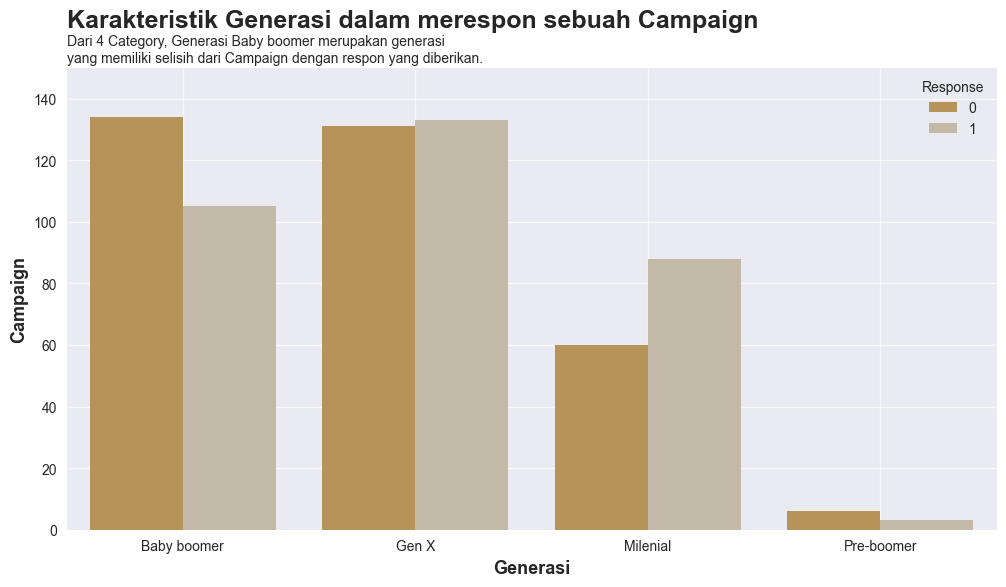

In [52]:
plt.style.use('seaborn')
clr = ["#C69749", "#C7BCA1"]
plt.figure(figsize=(12,6))
plt.title('Karakteristik Generasi dalam merespon sebuah Campaign', 
          loc='left', size = 18, fontweight = "bold", y =1.07)
plt.text(s = "Dari 4 Category, Generasi Baby boomer merupakan generasi\nyang memiliki selisih dari Campaign dengan respon yang diberikan.",
         x = -0.5, y = 152, ha = "left")
sns.barplot(x='Generation_Types',y='Total_Campaign', palette=clr,
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.ylabel("Campaign", fontweight = "bold", size = 13)
plt.xlabel("Generasi", fontweight = "bold", size = 13)
plt.grid(alpha=0.7)
plt.ylim([0,150])
# plt.savefig('generation.png', dpi=300, bbox_inches='tight')
plt.show()

**Insight**
1. Grafik diatas menunjukan bahwa setiap golongan memiliki kesadaran merespon yang berbeda-beda terlihat dari grafis diatas dan untuk perincian kesadarannya, ada di bawah ini:
- Dari yang paling tua adalah **Pre-boomer** : kami memaklumi kurangnya respon dari generasi ini karena memang umurnya yang sudah jauh
- **Baby boomer** : dilanjut dengan generasi ini masih memiliki persentasi yang respon lebih kecil dari total *Campaign* yang diterima
- **Gen X** : dari generasi ini selisih banyaknya menerima *Campaign* dengan yang respon lebih sedikit dari generasi sebelumnya terlihat dari grafis diatas
- **Milenial** : generasi yang lebih mudah dari generasi sebelumnya adalah Milenial karena mudanya umur kesadaran akan merespon *Campaign* yang diterima lebih tinggi dari sebelumnya. 

**Analisis** 
<p> Pertanyaan ini berfokus pada karakteristik dari generasi ke generasi tentang respon yang mereka berikan terkait dengan Campaign yang diterima semakin muda umurnya semakin merespon suatu Campaign, dengan begitu kita bisa lihat setiap generasi memiliki karakteristik seperti apa berdasarkan:<p>

- **Pre-boomer** : kami memaklumi kurangnya respon dari generasi ini karena memang umurnya yang sudah jauh dan bukan menjadi target kami selanjutnya dalam kampanye.
- **Baby boomer** : menurut dari sumber <a href="https://www.adjust.com/id/blog/how-to-market-your-app-to-different-generations/">Karakteristik Baby Boomer</a> di Amerika sendiri, Generasi ini merupakan salah satu generasi terbanyak yang jumlahnya nyaris mencapai 79 Juta penduduk karakteristik yang unik dengan umur yang sudah matang dan pendapatan yang besar menjadi tolak ukur dari analisis Campaign berdasarkan generasi dengan mencoba memahami cara berfikirnya sebagai acuan analisis
- **Gen X** : karena selisih respon dan total Campaign yang diterima dari generasi ini tidak terlalu tinggi maka dari itu kita akan coba fokus ke generasi Baby boomer untuk menjadi tolak ukur keberhasilan suatu produk untuk generasi selanjutnya
- **Milenial** : jika dilihat dari jumlah respon yang tinggi, terlihat bentuk portal dalam merespon Campaign melalui internet semacam aplikasi atau yang memang berdasarkan internet maka dari itu terlihat jelas selisih dari jumlah yang merespon untuk generasi ini dan generasi sebelumnya seperti Baby boomer sangat jauh.

**Rekomendasi**
<p>tolak ukur dari grafis ini adalah Baby boomer dengan karakter yang sangat unik, maka dari itu cara dari Campaign berikutnya akan kami ubah sesuai dengan cara berfikir generasi Baby boomer dengan mencoba menggunakan platform untuk merespon sebuah Campaign salah satunya dengan menggunakan kupon dan sebagainya dengan cara yang lebih sederhana sehingga generasi ini dapat mengikuti.<p>

#### **3. Karakteristik *Customer's* dalam merespon sebuah Campaign berdasarkan status**

In [44]:
status_selection = df[df['Total_Campaign'] != 0]
status_selection.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Observed_Time,Total_Campaign,Age,Generation_Types,Income_Status,LastPurchase,Year,Month
9,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,2015-02-02,1,65,Baby boomer,Lower Middle Class,90 Days,2014,3
15,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,1,2015-02-02,2,69,Baby boomer,Upper Middle Class,30 Days,2012,11


In [45]:
status_selection['Marital_Status'] = status_selection['Marital_Status'].replace({
    'Married':'In Relationship',
    'Together':'In Relationship',
    'Single':'Single',
    'Divorced':'Single',
    'Widow':'Single',
    'Alone':'Single',
    'Absurd':'Single',
    'YOLO':'Single',
})

status_selection['Marital_Status'].value_counts()

In Relationship    295
Single             163
Name: Marital_Status, dtype: int64

In [46]:
Marital_Status = df[['Marital_Status','Total_Campaign','Response']].groupby(by=['Marital_Status','Response']).sum('Total_Campaign').loc[['Married','Together','Single','Divorced','Widow','Absurd','Alone','YOLO']].reset_index()
Marital_Status

,Marital_Status,Response,Total_Campaign
0,Married,0,146
1,Married,1,114
2,Together,0,107
3,Together,1,59
4,Single,0,44
5,Single,1,92
6,Divorced,0,25
7,Divorced,1,43
8,Widow,0,9
9,Widow,1,18


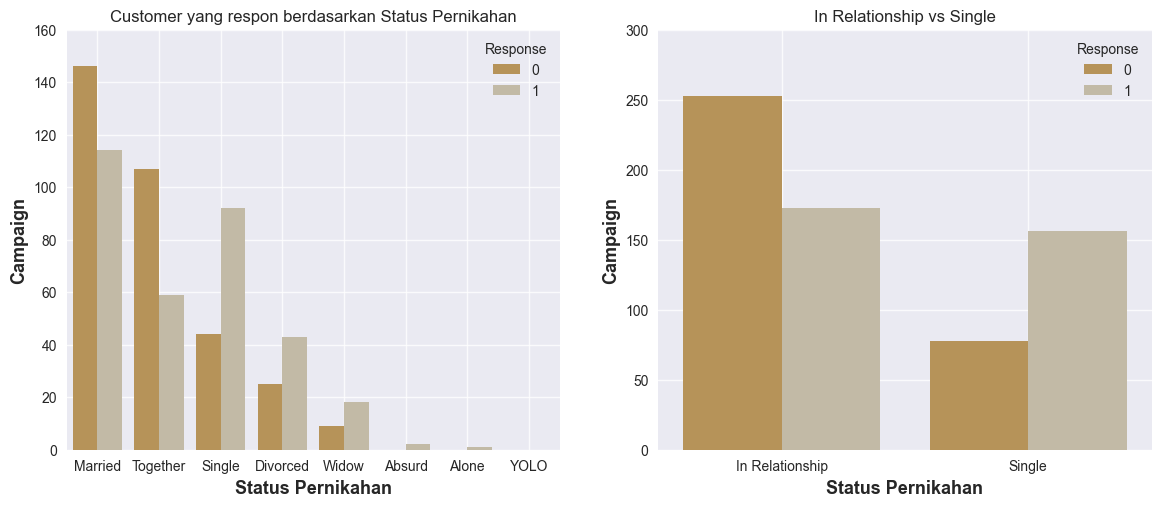

In [53]:
clr = ["#C69749", "#C7BCA1"]
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.title('Customer yang respon berdasarkan Status Pernikahan')
sns.barplot(x='Marital_Status',y='Total_Campaign', palette=clr,
            data=Marital_Status, hue='Response',
            ci=None,
            estimator=np.sum)
plt.ylabel("Campaign", fontweight = "bold", size = 13)
plt.xlabel("Status Pernikahan", fontweight = "bold", size = 13)
plt.grid(alpha=0.8)
plt.ylim([0,160])
plt.subplot(2,2,2)
plt.title('In Relationship vs Single')

sns.barplot(x='Marital_Status',y='Total_Campaign',  palette=clr,
            data=status_selection, hue='Response',
            ci=None,
            estimator=np.sum)
plt.ylabel("Campaign", fontweight = "bold", size = 13)
plt.xlabel("Status Pernikahan", fontweight = "bold", size = 13)
plt.grid(alpha=0.8)
plt.ylim([0,300])
plt.subplot(2,2,2)
# plt.savefig('status pernikahan.png')
plt.show()

Sebelum kita melihat lebih dalam terkait insight dan analisa setelah itu rekomendasi, mari kita pahami pengertian dari keterangan-keterangan berikut untuk bahan memahami insightnya lebih dalam.
- Absurd : Suatu status pernikahan yang tidak dapat di definisikan atau tidak masuk akal dan ini didefinisikan hidup sendiri
- Alone : adalah istilah yang menggambarkan kondisi seseorang yang berada dalam keadaan sendirian atau terisolasi dari interaksi sosial
dengan orang lain.
- Divorced : adalah istilah yang digunakan untuk menggambarkan status seseorang yang telah mengakhiri pernikahannya secara resmi melalui proses hukum yang disebut sebagai perceraian atau cerai. 
- Married : Married adalah istilah yang digunakan untuk menggambarkan status seseorang yang telah menikah secara resmi.
- Single : Single adalah istilah yang digunakan untuk menggambarkan status seseorang yang tidak menikah atau tidak memiliki pasangan saat ini.
- Together : adalah kata yang memiliki arti "bersama-sama". Istilah ini dapat digunakan dalam berbagai konteks, termasuk dalam hubungan romantis, persahabatan, keluarga, atau dalam lingkup pekerjaan dan bisnis.
- Widow : status mengacu pada status seseorang yang telah kehilangan pasangan hidupnya karena meninggal dunia dan tidak menikah lagi setelah itu.
- YOLO : singkatan dari frase "You Only Live Once", yang berarti "Kamu Hidup Hanya Sekali".

**Insight**
<P>Terlihat dari grafis diatas bahwa ada 9 status pernikahan sesuai dengan keterangan diatas dan kalo dilihat bahwa yang tidak merespon sebuah campaign kebanyak yang sudah memiliki pasangan, dengan angka paling tinggi adalah status Married, diikuti dengan together. dan berurut untuk yang golongan tidak memiliki pasangan paling tinggi adalah Single, dikuti dengan urutan kedua adalah Divorced, ketiga Widow untuk sisanya tidak terlihat<P>

**Analisis** 
<p>Dari grafis diatas kita bisa analisa bahwa yang memiliki pasangan lebih banyak yang tidak ngerespon Campaign dari yang statusnya Married & together terdapat beberapa kemungkinan dari yang tidak memiliki pasangan diantaranya karena yang melakukan pembelian itu pasangannya dan tidak merespon.

**Rekomendasi**
<p>Yang sudah kita tahu bahwa untuk persebaran data angka customer yang paling banyak ada di angka yang sudah memiliki pasangan entah itu secara resmi dan atau hanya sekedar tinggal bersama, maka dari itu untuk rekomendasi berikutnya kita perlu memastikan bahwa Campaign yang diterima yaitu seseorang yang sesuai dengan idnya bukan orang lain.<p>

#### **4. Karakteristik *Customer's* dalam merespon sebuah Campaign berdasarkan pendapatan**

In [48]:
status_selection['Income_Status'].unique()

array(['Lower Middle Class', 'Upper Middle Class', 'Middle', 'Rich'],
      dtype=object)

In [49]:
income_status = df[['Income_Status','Total_Campaign','Response']].groupby(by=['Income_Status','Response']).sum('Total_Campaign').loc[['Upper Middle Class','Middle','Lower Middle Class','Rich']].reset_index()
income_status

,Income_Status,Response,Total_Campaign
0,Upper Middle Class,0,170
1,Upper Middle Class,1,217
2,Middle,0,98
3,Middle,1,50
4,Lower Middle Class,0,63
5,Lower Middle Class,1,50
6,Rich,0,0
7,Rich,1,12


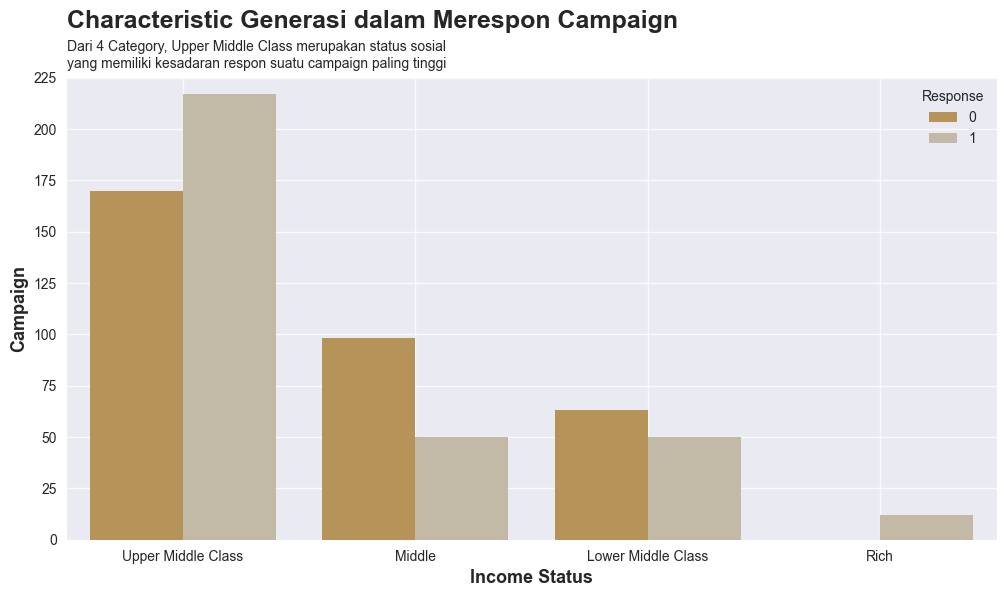

In [50]:
clr = ["#C69749", "#C7BCA1"]
plt.figure(figsize=(12,6))
# plt.title('generasi vs campaign yang diterima')
sns.barplot(x='Income_Status',y='Total_Campaign', palette=clr,
            data=income_status, hue='Response',
            ci=None,
            estimator=np.sum)
plt.ylabel("Campaign", fontweight = "bold", size = 13)
plt.xlabel("Income Status", fontweight = "bold", size = 13)
plt.grid(alpha=0.8)
plt.ylim([0,225])
plt.title("Characteristic Generasi dalam Merespon Campaign", size = 18, fontweight = "bold", y =1.09, loc='left')
plt.text(s = "Dari 4 Category, Upper Middle Class merupakan status sosial\nyang memiliki kesadaran respon suatu campaign paling tinggi",
         x = -0.5, y = 230, ha = "left")
plt.show()

**Insight**
<P>Berdasarkan cart diatas bahwa terdapat 4 golongan karakteristik berdasarkan tingkat pendapatan seseorang dengan cara respon yang berbeda, disini terdapat status Upper Middle Class yang memiliki angka tertinggi dalam merespon sebuah Campaign dibandingan tingkat pendapatan yang lainnya. Namun sebelum analisa lebih lanjut terkait analisa dari chart diatas akan dijelaskan perihal status pendapatan berdasarkan chart diatas, yaitu:<P>

1. Upper Middle Class : mencakup status kekayaan orang yang berhasil dengan pendapatan yang lebih dari cukup sehingga untuk orang tersebut menjadi kelas middle tergolong aga sulit namun butuh waktu yang cukup panjang untuk mencapai ke level Rich
2. Middle : mencakup status kekayaan orang yang pendapatannya standar seperti pegawai kantoran yang menghidupi kehidupannya dari gaji saja.
3. Lower Middle Class : mencakup status kekayaan seseorang berdasarkan pendapatan yang tidak tetap namun masih bisa menghidupi kebutuhannya sedikit.
4. Rich : golongan tersebut tergolong sudah memiliki banyak pendapatan dan sudah bisa hidup tampa bekerja. 

Berdasarkan golong-golongan dengan status pendapatan[<a href="https://www.adjust.com/id/blog/how-to-market-your-app-to-different-generations/">1</a>] yang berbeda kita dapat menganalisis lebih jauh terkait karakteristik seseorang yang merespon suatu Campaign.

**Analisis** 
<p>Terdapat perbedaan kesadaran terhadap merespon suatu Campaign untuk golongan yang status pendapatannya middle dengan atasnya, jika kita lihat walaupun kebanyakan dari customer merupakan generasi Baby Boomer atau golongan dengan umur diatas 50 tahun namun jika status pendapatannya sudah mencapai Upper Middle Class keatas, sifat merespon suatu Campaign terbilang positif karena walaupun dengan umur yang sudah matang namun untuk yang status pendapatanya tinggi terlihat kesadaran terkait teknologi dengan kemampuan membeli sebuah barang yang bersifat gawai dari pendapatannya.<p>

**Rekomendasi**
<p>Untuk rekomendasi berdasarkan status sosial dalam analisis ini, ada keterkaitan dengan analisis sebelumnya terkait generasi bahwa selain kita harus mengikuti karakteristik generasi Baby boomer dengan mengikuti kebutuhannya untuk mendapatkan pasar dari Baby boomer sendiri, di analisis ini rekomendasi yang pas adalah dengan mengedukasi kembali golongan yang status pendapatannya dari middle sampai dengan lower middle class untuk merespon sebuah Campaign dan memberikan benefit lebih terkait golongan ini, jika merespon sebuah Campaign dengan salah satunya adalah diberikan merchandise atau yang sifatnya sama.<p>

### **Save Data**

Menyimpan data yang sudah bersih
tidak akan disimpan

In [51]:
# Data di komen karena sudah disave sebelumnya
# df.to_excel('./New_Supermarket_Customers.xlsx', index=False)

---
## **CONCLUSION**

Berdasarkan dari hasil analisis data pelanggan perusahan tahun 2012-2014 yang melakukan respon dalam sebuah Campaign, maka dapat menjawab pertanyaan Tim Retail Market yaitu:

Dari 3 tahun kemarin Campaign yang kita buat itu mengalami banyak penurunan dari permasalah tersebut kita ingin melihat ciri-cirinya kenapa si bisa mengalami penurunan dari tiga tahun terakhir ini, dengan harapan di tahun 2015 itu akan naik kembali maka dari itu kita bisa melihat dari ciri-ciri tersebut ternyata Baby boomer dengan pendapatan dibawah rata-rata dengan status hubungi yang memiliki pasangan memiliki tingkat responsif dalam sebuah campaign yang diterima itu sangat rendah, dari pola tersebut untuk kedepannya bisa lebih baik untuk campaign yang sedang dijalankan.